In [1]:
### Assingment 4 Benjamin Abro(40122906) Stat 497
%load_ext autoreload
%autoreload 2

import pandas as pd
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)
import numpy as np
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import os

In [2]:
### We are going to do linear regression on the mens 100m world record starting from 1977 and projecting from 2022 to 2030
## first we must create a dataframe of the world record times and year from 1977 to the current record.
years = list(range(1977,2023))
times = [9.95,9.95,9.95,9.95,9.95,9.95,9.95,9.93,9.93,9.93,9.93,9.93,9.92,9.92,9.92,9.86,9.86,9.86,9.85,9.85,9.84,9.84,9.84,9.79,9.79,9.79,9.79,9.79,9.79,9.77,9.77,9.74,9.69,9.58,9.58,9.58,9.58,9.58,9.58,9.58,9.58,9.58,9.58,9.58,9.58,9.58] #Note records that were later rescinded have not been included
#Also note these are the records on january 1st of the corresponding year
df = pd.DataFrame({"Time": times, "Date": years})
times = np.array(times)
years = np.array(years)
times = times.reshape(-1,1)
years = years.reshape(-1,1)
## Now we have the 100m mens world record from 1977 to 2022 in a dataframe as desired

In [3]:
## Now lets do linear regression on the dataframe
reg = LinearRegression()
reg.fit(years,times)
y_pred = reg.predict(years)
pred_val = list(range(2023,2031))
real_val = list(range(1977,2023))
actual_pred = reg.predict(np.array([pred_val]).reshape(-1,1))
actual_pred
reg_line = reg.predict(np.array([real_val]).reshape(-1,1))
##Our prediction for the 100m mens world record from 2023 to 2030 are as seen below

In [4]:
## Now lets make a dataframe of our predicted values
actual_pred = actual_pred.ravel() ## Changing dimensions
reg_line = reg_line.ravel() ## Changing dimensions
df_pred = pd.DataFrame({"Time": actual_pred, "Date": pred_val})
df_pred ### This is a dataframe of our predicted values
df_reg = pd.DataFrame({"Time": reg_line, "Date": real_val})



In [5]:
## Now lets make a combined dataframe of both predicted and actual values
total_times = np.append(times, actual_pred)
total_times = total_times.ravel()
total_years = list(range(1977,2031))
df_total = pd.DataFrame({"Time": total_times, "Date": total_years})



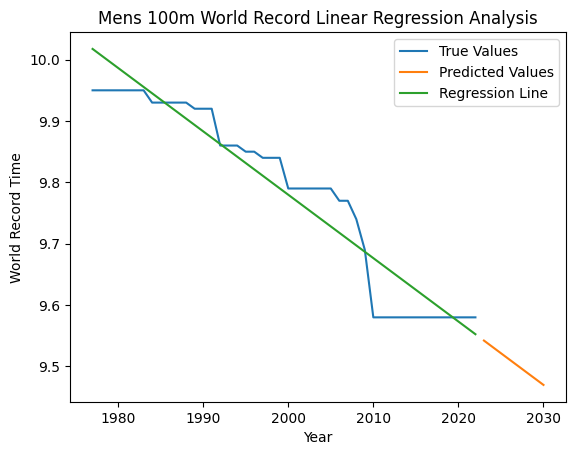

In [6]:
### Now to plot our findings
plt.plot(df["Date"],df["Time"], label = "True Values")
plt.plot(df_pred["Date"],df_pred["Time"], label = "Predicted Values")
plt.plot(df_reg["Date"],df_reg["Time"], label = "Regression Line")
plt.xlabel("Year")
plt.ylabel("World Record Time")
plt.title("Mens 100m World Record Linear Regression Analysis")
plt.legend(loc="upper right")
plt.savefig('100mlinreg.jpg')

In [7]:
### Now lets do some regression analytics
## First lets find our RSS
residual = df["Time"]-df_reg["Time"]
residual = residual*residual
RSS = sum(residual)
RSS
#Thus our RSS is outputted below

0.07730748072772158

In [8]:
# next lets find our total sum of squares
y_bar = df["Time"].mean()
TSS = df["Time"] - y_bar
TSS = TSS * TSS
TSS = sum(TSS)
TSS
## Thus our TSS is outputted below

0.942749999999997

In [9]:
## Now lets find our R^2 value
R_Sq = 1- RSS/TSS
R_Sq
## Therefore we have an R^2 value of 0.918

0.9179978989894226

In [11]:
from statsmodels import api as sm
x = sm.add_constant(years)
model = sm.OLS(times,x)
results = model.fit()
print(results.summary())
## The R-squared value givin in this regression is the same as the one we found on our own. Thus we can infer that the results are correct
## Therefore our regression equation is times = -0.0103*years + 30.4434
## With p-values approximating 0 we can assume that this is an adiquite model 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     492.6
Date:                Wed, 12 Oct 2022   Prob (F-statistic):           1.58e-25
Time:                        19:15:51   Log-Likelihood:                 81.667
No. Observations:                  46   AIC:                            -159.3
Df Residuals:                      44   BIC:                            -155.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.4434      0.931     32.706      0.0

In [13]:
df_pred

,Time,Date
0,9.542203,2023
1,9.531871,2024
2,9.521539,2025
3,9.511208,2026
4,9.500876,2027
5,9.490544,2028
6,9.480212,2029
7,9.469880,2030
